In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

order_id - id заказа

delivery_time - время доставки в минутах

district - район доставки

experiment_group - экспериментальная группа

In [23]:
df = pd.read_csv('experiment_lesson_4.csv')
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


1. Сопоставьте графики распределения и  экспериментальные группы:


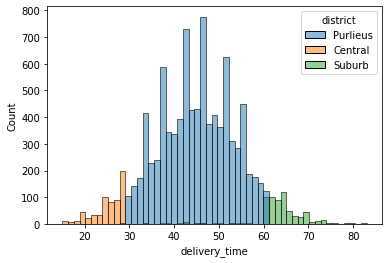

In [24]:
sns.histplot(x='delivery_time', hue='district', data=df[df.experiment_group == "control"])

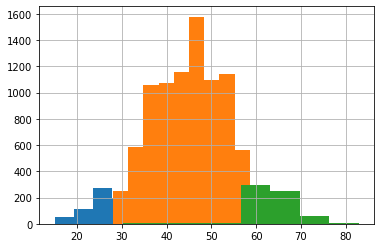

In [25]:
control = df[df.experiment_group == "control"].groupby('district').delivery_time.hist()


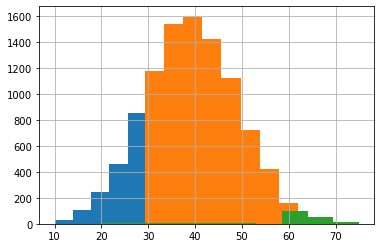

In [26]:
test = df[df.experiment_group == "test"].groupby('district').delivery_time.hist()

2. Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [27]:
df.experiment_group.value_counts()[0] - df.experiment_group.value_counts()[1]

12

3. Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность 
и посчитаем стандартное отклонение в тесте и в контроле.

Вообще для выборок таких колоссальных размеров мы не обязаны это делать - 
в отсутствие слишком уж выраженной асимметрии и выбросов в данных t-тест и так работать будет нормально, 
но посмотреть лишний раз всё равно можно :)

Обычно нормальность тестируют с помощью теста Шапиро-Уилка (scipy.stats.shapiro()), 
однако на больших выборках этот тест слишком рьяно находит отклонения от нормальности! 
Поэтому используйте функцию scipy.stats.normaltest() - она больше адаптирована к большим выборкам.

Также можете сделать это через пакет pingouin - вот этой функцией. Не забудьте выбрать правильный аргумент!


In [28]:
test = df[df.experiment_group == "test"]
control = df[df.experiment_group == "control"]

In [29]:
df[df.experiment_group == "test"].delivery_time.std()

9.883308351129061

In [30]:
stats.normaltest(test.delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [31]:
stats.normaltest(control.delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [32]:
control.delivery_time.std()

9.990016960246372

In [33]:
test.delivery_time.std()

9.883308351129061

4. Вас могла смутить ненормальность распределения теста, полученная на прошлом шаге - однако если посмотреть 
на саму форму распределения, то оно не настолько сильно нарушает нормальность, чтобы об этом беспокоиться 
на таком размере выборки! Поэтому не переживаем 😎

Теперь пришло время сравнить средние в тесте и контроле. 

In [34]:
stats.ttest_ind(control.delivery_time, test.delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

5. На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

Знак изменения необходимо учесть!

In [36]:
((test.delivery_time.mean() - control.delivery_time.mean())/control.delivery_time.mean()) * 100

-13.354653121660812

In [45]:
test.delivery_time.describe()

count    10104.000000
mean        39.046813
std          9.883308
min         10.000000
25%         32.000000
50%         39.000000
75%         46.000000
max         75.000000
Name: delivery_time, dtype: float64

In [46]:
control.delivery_time.describe()

count    10092.000000
mean        45.065101
std          9.990017
min         15.000000
25%         38.000000
50%         45.000000
75%         52.000000
max         83.000000
Name: delivery_time, dtype: float64